In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import os.path
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import poisson

In [8]:
def ColumnNames():
    return ['col1', 'col2', 'col3', 'average']

def PreProcess(filepath, skiprows, usecols): 
    """
    This function reads data and add min, max, include_mean values.
    
    Parameters
    ----------
    filepath : filepath of the data
    skiprows: number of rows to skip from the csv file
    usecols: range of columns of data to read in.
               
    Returns
    -------
    data : The original count data and some added columns of new stats data.
    """
    print 'Reading Data from \"{0}\"'.format(os.path.basename(filepath))
    data = pd.read_csv(filepath, skiprows=skiprows,usecols=usecols,na_values=' ', header = None, names = ColumnNames() ).dropna(axis=0)
    data['col_min'] = data.apply(lambda row: min(row['col1'],row['col2'],row['col3']), axis=1)
    data['col_max'] = data.apply(lambda row: max(row['col1'],row['col2'],row['col3']), axis=1)
    data['col_median'] = data.apply(lambda row: np.median([row['col1'],row['col2'],row['col3']]), axis=1)
    data['col_gap'] = data['col_max']-data['col_min']
    data['complete'] = data['col_gap']>=2
    data['include_mean'] = data.apply(lambda row: ((row['col1'] == round(row['average']) or row['col2'] == round(row['average']) or 
                                                               row['col3'] == round(row['average'])) and row['complete']),axis=1)
    return  data

def GetStats(data):
    """
    This function reads data and print relevant stats.
    
    Parameters
    ----------
    data : preprocessed data with the desired columns
    """    
    total = len(data)
    complete = len(data[data['complete']])
    no_mean = len(data[data['include_mean'] == True])
    #mid_ratio = data[data['complete']].apply(lambda row: (row['col_median']-row['col_min'])/row['col_gap'], axis=1)
    #plt.figure();
    #sns.distplot(mid_ratio, bins=10, norm_hist=True)
    print 'total:{0}, number_of_complete:{1}, number_of_mean:{2}'.format(total, complete, no_mean)
    
def MidRatioHistPlot(data):
    mid_ratio = data[data['complete']].apply(lambda row: (row['col_median']-row['col_min'])/row['col_gap'], axis=1)
    mid_ratio_value, mid_ratio_range = np.histogram(mid_ratio, bins = 10)
    mid_ratio_percentage = mid_ratio_value/float(len(mid_ratio)) * 100
    plt.bar(np.arange(0,10), mid_ratio_percentage)
    plt.axis([0, 10, 0, 1.5*max(mid_ratio_percentage)])
    plt.xticks(np.arange(0,10), mid_ratio_range)
    plt.xlabel('Mid ratio range')
    plt.ylabel('Probability')
    plt.show()

In [56]:
data_dir = '../data/PittHill_OSFdata_2016/csv/'
rts_colony = PreProcess(os.path.join(data_dir,'Bishayee Colony Counts 10.27.97-3.8.01.csv'),3,range(3,7))
others_colony = PreProcess(os.path.join(data_dir,'Other Investigators in Lab.Colony Counts.4.23.92-11.27.02.csv'),2,range(3,7))
#rts_coulter = PreProcess(os.path.join(data_dir,'Bishayee Coulter Counts.10.20.97-7.16.01.csv'),2,range(2,6))
#others_coulter = PreProcess(os.path.join(data_dir,'Other Investigators in Lab.Coulter Counts.4.15.92-5.21.05.csv'),2,range(2,6))

Reading Data from "Bishayee Colony Counts 10.27.97-3.8.01.csv"
Reading Data from "Other Investigators in Lab.Colony Counts.4.23.92-11.27.02.csv"


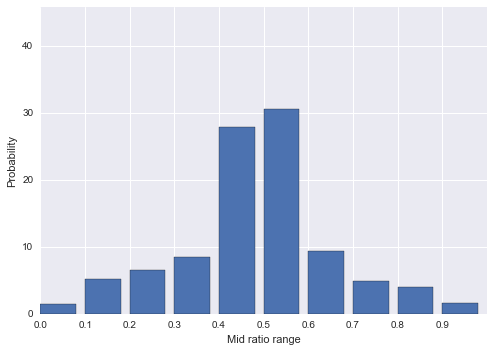

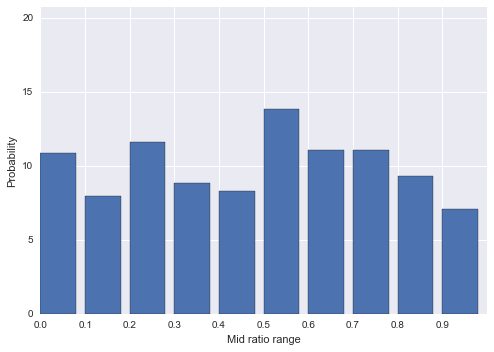

In [10]:
MidRatioHistPlot(rts_colony)
MidRatioHistPlot(others_colony)

In [26]:
GetStats(rts_colony)
GetStats(others_colony)
#GetStats(rts_coulter)
#GetStats(others_coulter)


total:1361, number_of_complete:1343, number_of_mean:690
total:597, number_of_complete:578, number_of_mean:109


In [49]:
def ChooseN(moment):
    MAX_N = 1000000
    EPSILON = 1e-9
    prob_sum = 0
    for j in range(0, MAX_N):
        prob_sum = prob_sum + poisson.pmf(j, moment)
        if prob_sum >= 1-EPSILON:
            print 'For moment: {0}, Choose N:{1}'.format(moment, j)
            return j
        
def PoissonMidRatio(moment, left_ratio, right_ratio):
    prob = 0
    N = ChooseN(moment)
    for j in list(range(2, N + 1)):
        for k in list(range(j, N + 1)):
            inner = poisson.cdf(min(k,math.ceil(right_ratio*j+k-j)), moment) - poisson.cdf(max(k-j,math.floor(left_ratio*j+k-j)), moment)
            outer = poisson.pmf(k, moment) * poisson.pmf(k - j, moment)
            prob = prob + outer * inner    
    prob = 6 * prob
    return(prob)

In [51]:
leftRatio = 0.4
rightRatio = 0.6
poisMoments = range(1, 50) # each mean-variance parameter of the Poisson distribution
probs = np.zeros(len(poisMoments))

# Computing the probability of the mid ratio between leftRatio and rightRatio
for i in range(len(poisMoments)):
    probs[i] = PoissonMidRatio(poisMoments[i], leftRatio, rightRatio)

For moment: 1, Choose N:11
For moment: 2, Choose N:15
For moment: 3, Choose N:18
For moment: 4, Choose N:21
For moment: 5, Choose N:23
For moment: 6, Choose N:26
For moment: 7, Choose N:28
For moment: 8, Choose N:30
For moment: 9, Choose N:32
For moment: 10, Choose N:34
For moment: 11, Choose N:36
For moment: 12, Choose N:38
For moment: 13, Choose N:40
For moment: 14, Choose N:42
For moment: 15, Choose N:43
For moment: 16, Choose N:45
For moment: 17, Choose N:47
For moment: 18, Choose N:49
For moment: 19, Choose N:50
For moment: 20, Choose N:52
For moment: 21, Choose N:54
For moment: 22, Choose N:55
For moment: 23, Choose N:57
For moment: 24, Choose N:59
For moment: 25, Choose N:60
For moment: 26, Choose N:62
For moment: 27, Choose N:64
For moment: 28, Choose N:65
For moment: 29, Choose N:67
For moment: 30, Choose N:68
For moment: 31, Choose N:70
For moment: 32, Choose N:71
For moment: 33, Choose N:73
For moment: 34, Choose N:74
For moment: 35, Choose N:76
For moment: 36, Choose N:77
F

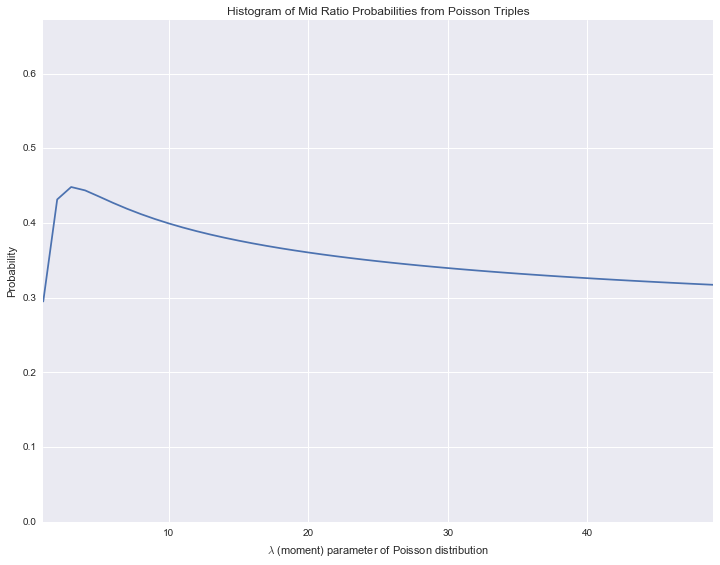

In [52]:
plt.figure(num = None, figsize=(12, 9), dpi=80)
plt.plot(poisMoments, probs)
plt.xlabel('$\lambda$ (moment) parameter of Poisson distribution')
plt.ylabel('Probability')
plt.title(r'Histogram of Mid Ratio Probabilities from Poisson Triples')
plt.axis([min(poisMoments), max(poisMoments), 0, min(1.5 * max(probs), 1)])
plt.show()